In [1]:
#Como primer paso importé algunas de las librerias necesarias para el análisis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Procedo a leer y extraer la información del archivo homicidios.xlsx

In [2]:
#Uso pd.read_excel para leer el archivo
#El archivo contiene hojas, por lo cual se usará `sheet_name=None` para leer cada una.
data = pd.read_excel("./homicidios.xlsx", sheet_name=None)
# La variable "data" ahora se convierte en un diccionario y el nombre de las hojas en claves.
#Para acceder a las hojas específicas.
df_hechos = data["HECHOS"]
df_victimas = data["VICTIMAS"]

In [3]:
#  Procedo a eliminar columnas que no me resultan útiles para el análisis.
df_hechos.drop(columns=["LUGAR_DEL_HECHO","Calle", "Altura","Cruce","Dirección Normalizada", "XY (CABA)","PARTICIPANTES"], inplace= True)

A continuación, procedo a normalizar el nombre de las columnas, ya que las mismas se encuentran en mayúsculas y minúsculas.

In [4]:
# Renombro las columnas necesarias
df_hechos = df_hechos.rename(columns={"HH":"FRANJA_H","pos x": "POS_X", "pos y": "POS_Y"})
df_victimas = df_victimas.rename(columns={"ID_hecho": "ID"})

In [5]:
# Procedo a realizar la unión de los dataframes.
df_siniestros = pd.merge(df_hechos, df_victimas, on=["ID", "FECHA", "AAAA", "MM", "DD", "VICTIMA"], how="inner")
df_siniestros.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,FRANJA_H,TIPO_DE_CALLE,COMUNA,POS_X,POS_Y,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,8,-58.47533969,-34.68757022,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AVENIDA,1,-58.39040293,-34.63189362,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AVENIDA,8,-58.46503904,-34.68092974,MOTO,SD,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AVENIDA,1,-58.38718297,-34.62246630,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00


Convierto ciertas variable del df a categoricas

In [6]:
# Procedo a convertirlas a variables categóricas.
df_siniestros["TIPO_DE_CALLE"]= df_siniestros["TIPO_DE_CALLE"].astype("category")
df_siniestros["VICTIMA"]= df_siniestros["VICTIMA"].astype("category")
df_siniestros["ACUSADO"]= df_siniestros["ACUSADO"].astype("category")
df_siniestros["ROL"]= df_siniestros["ROL"].astype("category")
df_siniestros["SEXO"]= df_siniestros["SEXO"].astype("category")

In [7]:
# Realizo modificaciones en la columna HORA, ya que contiene el registro vacio.
df_siniestros.HORA = df_siniestros.HORA.replace({"SD": "00:00:00", })

In [8]:
# Realizo modificaciones en la columna HORA, ya que contiene fechas y horas mezcladas-
# Convierto la columna HORA a string 
df_siniestros["HORA"] = df_siniestros["HORA"].astype("str")
# Convierto la columna 'HORA' a formato datetime
df_siniestros["HORA"] = pd.to_datetime(df_siniestros["HORA"])
# Extraigo solo la parte de tiempo
df_siniestros["HORA"] = df_siniestros["HORA"].dt.time


In [9]:
# Realizo modificaciones en la columna FECHA.
df_siniestros["AAAA"] = df_siniestros["FECHA"].dt.year
df_siniestros["MM"] = df_siniestros["FECHA"].dt.month
df_siniestros["DD"] = df_siniestros["FECHA"].dt.day

In [10]:
# Se crea una nueva columna para el día de la semana
dias_semana_espanol = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
dias_semana_ingles = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_siniestros["DIA_SEMANA"] = df_siniestros["FECHA"].dt.strftime("%A").map(
    {dia_ingles: dia_espanol for dia_ingles, dia_espanol in zip(dias_semana_ingles, dias_semana_espanol)}
)

In [11]:
df_siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   711 non-null    object        
 1   N_VICTIMAS           711 non-null    int64         
 2   FECHA                711 non-null    datetime64[ns]
 3   AAAA                 711 non-null    int32         
 4   MM                   711 non-null    int32         
 5   DD                   711 non-null    int32         
 6   HORA                 711 non-null    object        
 7   FRANJA_H             711 non-null    object        
 8   TIPO_DE_CALLE        711 non-null    category      
 9   COMUNA               711 non-null    int64         
 10  POS_X                711 non-null    object        
 11  POS_Y                711 non-null    object        
 12  VICTIMA              711 non-null    category      
 13  ACUSADO              711 non-null  

In [12]:
# Realizo modificaciones en la columna FRANJA_H, ya que contiene el registro vacio.
df_siniestros.FRANJA_H = df_siniestros.FRANJA_H.replace({"SD": "0", })

In [13]:
# Consulto si hay registros duplicados en el dataframe
duplicados = df_siniestros.duplicated().sum()
duplicados

0

In [14]:
#Luego convierto el dataframe a csv
df_siniestros.to_csv("Siniestros.csv")

In [15]:
#Leo el csv resultante
df_siniestros = pd.read_csv("./Datasets/Siniestros.csv")
df_siniestros.head()

,Unnamed: 0,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,FRANJA_H,TIPO_DE_CALLE,COMUNA,POS_X,POS_Y,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,DIA_SEMANA
0,0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,8,-58.47533969,-34.68757022,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00,Viernes
1,1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00,Sábado
2,2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AVENIDA,1,-58.39040293,-34.63189362,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00,Domingo
3,3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AVENIDA,8,-58.46503904,-34.68092974,MOTO,SD,CONDUCTOR,MASCULINO,18,SD,Domingo
4,4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AVENIDA,1,-58.38718297,-34.62246630,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00,Jueves


In [16]:
# Exploro la columna "Unnamed".
df_siniestros["Unnamed: 0"]
#La columna Unnamed repite la misma información que ID, por ello procedo a eliminarla
df_siniestros.drop(columns=["Unnamed: 0"], inplace= True)

EDA

In [17]:
# Realizamos un describe, que nos devuelve información estadística de los datos del dataframe.
df_siniestros.describe()

,N_VICTIMAS,AAAA,MM,DD,FRANJA_H,COMUNA
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,1.056259,2018.177215,6.669480,16.030942,11.585091,7.414909
std,0.248232,1.673182,3.576395,8.641149,6.706587,4.385733
min,1.000000,2016.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,2017.000000,4.000000,9.000000,6.000000,4.000000
50%,1.000000,2018.000000,7.000000,16.000000,11.000000,8.000000
75%,1.000000,2019.000000,10.000000,23.000000,17.000000,11.000000
max,3.000000,2021.000000,12.000000,31.000000,23.000000,15.000000


In [18]:
# Consulto en que columnas se encuentran los valores faltantes/nulos y la cantidad de los mismos.
valores_faltantes_por_columna = df_siniestros.isnull().sum()
valores_faltantes_por_columna

ID                     0
N_VICTIMAS             0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
HORA                   0
FRANJA_H               0
TIPO_DE_CALLE          0
COMUNA                 0
POS_X                  0
POS_Y                  0
VICTIMA                0
ACUSADO                0
ROL                    0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
DIA_SEMANA             0
dtype: int64

Comenzamos la exploración a través de gráficos 

Cantidad de víctimas fatales año 2016: 145
Cantidad de víctimas fatales año 2017: 137
Cantidad de víctimas fatales año 2018: 149
Cantidad de víctimas fatales año 2019: 104
Cantidad de víctimas fatales año 2020: 79
Cantidad de víctimas fatales año 2021: 97


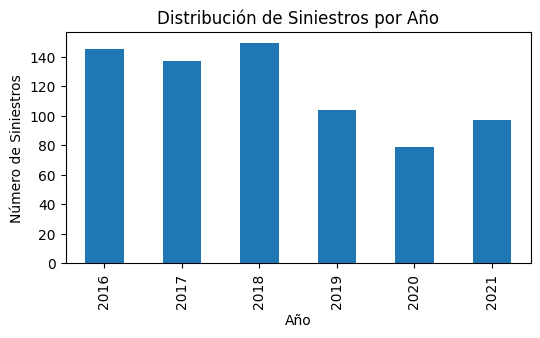

In [19]:
 # Frecuencia de los siniestros por año
def analisis_descriptivo(df_siniestros):
    total_siniestros = len(df_siniestros)
    print(f"Total de siniestros viales: {total_siniestros}")
    # Distribución por tiempo.
    df_siniestros["FECHA"] = pd.to_datetime(df_siniestros["FECHA"])
    df_siniestros["AAAA"] = df_siniestros["FECHA"].dt.year
    df_siniestros["MM"] = df_siniestros["FECHA"].dt.month
    df_siniestros["DD"] = df_siniestros["FECHA"].dt.dayofweek 
    # Cuento la cantidad de accidentes por año.    
for year in range(2016, 2022):
    count = len(df_siniestros[df_siniestros["AAAA"] == year])
    print(f"Cantidad de víctimas fatales año {year}: {count}") 
          
# Grafico lo anterior.
df_siniestros["AAAA"].value_counts().sort_index().plot(kind="bar", figsize=(6, 3))
plt.title("Distribución de Siniestros por Año")
plt.xlabel("Año")
plt.ylabel("Número de Siniestros")
plt.show()

En el gráfico de distribución de accidentes por año, claramente nos muestra que el año 2020, en comparación al 2019 tuvo una  disminución de los siniestros, esto  se debe al impacto de la cuarenta en la pandemia por Covid.
Consultando fuentes externas al dataset provisto. https://www.eldiarioar.com/servicios/transporte-durante-pandemia-accidentes-transito-bicicletas_1_8258092.html

Cantidad de accidentes en el mes 1: 62
Cantidad de accidentes en el mes 2: 59
Cantidad de accidentes en el mes 3: 56
Cantidad de accidentes en el mes 4: 52
Cantidad de accidentes en el mes 5: 59
Cantidad de accidentes en el mes 6: 58
Cantidad de accidentes en el mes 7: 50
Cantidad de accidentes en el mes 8: 67
Cantidad de accidentes en el mes 9: 49
Cantidad de accidentes en el mes 10: 52
Cantidad de accidentes en el mes 11: 68
Cantidad de accidentes en el mes 12: 79


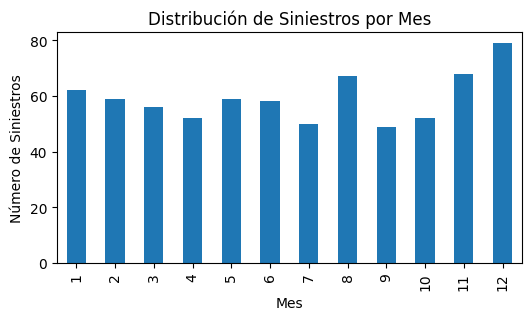

In [20]:
# Defino un diccionario para almacenar el recuento de accidentes por mes
accidentes_por_mes = {}
# Va a iterar sobre cada mes del df y contar los accidentes
for mes in range(1, 13):  # Meses del 1 al 12
    count = len(df_siniestros[df_siniestros["MM"] == mes])
    accidentes_por_mes[mes] = count
# Imprimo el recuento de accidentes por mes
for mes, count in accidentes_por_mes.items():
    print(f"Cantidad de accidentes en el mes {mes}: {count}")

# Gráfico de barras para la distribución de meses
df_siniestros["MM"].value_counts().sort_index().plot(kind="bar", figsize=(6, 3))
plt.title("Distribución de Siniestros por Mes")
plt.xlabel("Mes")
plt.ylabel("Número de Siniestros")
plt.show()

En el gráfico anterior, nos muestra que el mes con mayor cantidad de siniestros viales es el mes de diciembre, seguido por el mes de noviembre.

Cantidad de accidentes en Lunes: 107
Cantidad de accidentes en Martes: 101
Cantidad de accidentes en Miércoles: 98
Cantidad de accidentes en Jueves: 96
Cantidad de accidentes en Viernes: 102
Cantidad de accidentes en Sábado: 102
Cantidad de accidentes en Domingo: 105


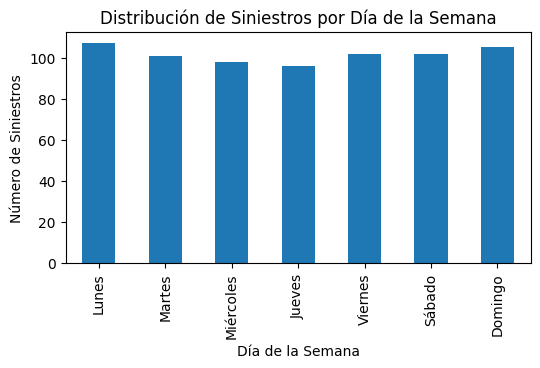

In [21]:
#Seguidamente grafico los siniestros por día de la semana, para ello:
# Convierto las fechas y extraigo los días de la semana.
df_siniestros["FECHA"] = pd.to_datetime(df_siniestros["FECHA"])
df_siniestros["DD"] = df_siniestros["FECHA"].dt.dayofweek
# Creo un diccionario para mapear el número del día de la semana.
dias_semana = { 0: "Lunes", 1: "Martes", 2: "Miércoles", 3: "Jueves", 4: "Viernes", 5: "Sábado", 6: "Domingo"}
# Defino un diccionario para almacenar el recuento de accidentes por día de la semana
accidentes_por_dia = {}
# Iterar sobre cada día de la semana (0: lunes, 1: martes, ..., 6: domingo)
for dia in range(7):
    count = len(df_siniestros[df_siniestros["DD"] == dia])
    accidentes_por_dia[dia] = count
# Imprimir el recuento de accidentes por día de la semana
nombres_dias = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
for dia, count in accidentes_por_dia.items():
    print(f"Cantidad de accidentes en {nombres_dias[dia]}: {count}")


# Realizo el gráfico de barras para la distribución de días de la semana
df_siniestros["DD"].value_counts().sort_index().plot(kind="bar", figsize=(6, 3))
plt.title("Distribución de Siniestros por Día de la Semana")
plt.xlabel("Día de la Semana")
plt.ylabel("Número de Siniestros")
# Asigno los nombres de los días de la semana a las etiquetas del eje x
plt.xticks(df_siniestros["DD"].value_counts().sort_index().index, [dias_semana[d] for d in df_siniestros["DD"].value_counts().sort_index().index])
plt.show()

En el gráfico anterior, nos muestra que el día con mayor cantidad de siniestros viales es el día lunes, seguido por el día domingo. 

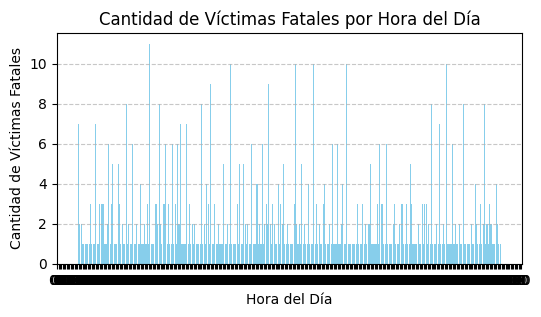

In [22]:
# Importo la libreria necesaria para dar el formato a los ticks
import matplotlib.ticker as ticker

# Calculo los siniestros por hora del día.
victimas_por_hora = df_siniestros["HORA"].value_counts().sort_index()
plt.figure(figsize=(6, 3))
plt.bar(victimas_por_hora.index, victimas_por_hora.values, color="skyblue")
plt.xlabel("Hora del Día")
plt.ylabel("Cantidad de Víctimas Fatales")
plt.title("Cantidad de Víctimas Fatales por Hora del Día")
plt.xticks(range(24))

# Formatear las etiquetas del eje x para que muestren las horas correctamente
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Valores Atípicos/ Outliers.

Un valor atípico puede representar situaciones inusuales o extremas que pueden tener un impacto significativo en la seguridad vial y la toma de decisiones relacionadas con el tráfico. Identificar y comprender estos valores atípicos es crucial para diseñar políticas y estrategias efectivas de prevención de accidentes.

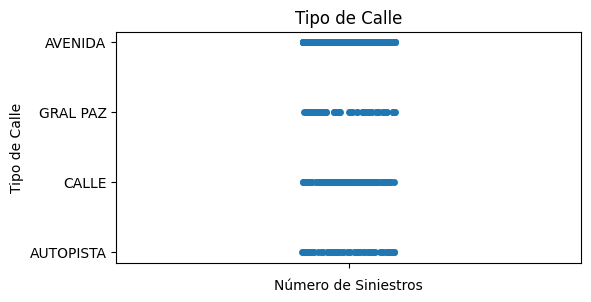

In [23]:
# Busco outliers en los lugares donde ocurren los siniestros.
# Tipo de Calle
plt.figure(figsize=(6, 3))
sns.stripplot(y=df_siniestros["TIPO_DE_CALLE"], jitter=True, orient="h")
plt.title("Tipo de Calle")
plt.xlabel("Número de Siniestros")
plt.ylabel("Tipo de Calle")
plt.show()

Claramente, Gral Paz está como nombre de calle, y es una avenida.
Información consultada en https://buenosaires.gob.ar/movilidad/gerencia-operativa-de-logistica-urbana/normativa-general/avenida-general-paz#:~:text=La%20Avenida%20General%20Paz%20es,sobre%20el%20R%C3%ADo%20Matanza%2DRiachuelo.

In [24]:
# Procedo a reemplazar "GRAL PAZ" por "AVENIDA".
df_siniestros["TIPO_DE_CALLE"] = df_siniestros["TIPO_DE_CALLE"].str.replace("GRAL PAZ", "AVENIDA")

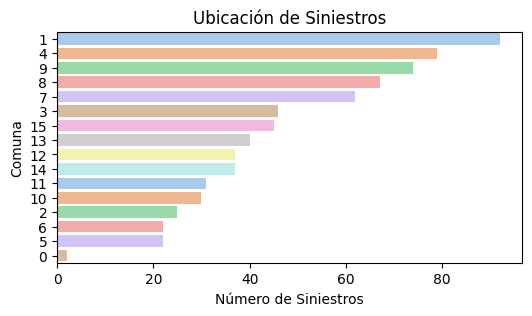

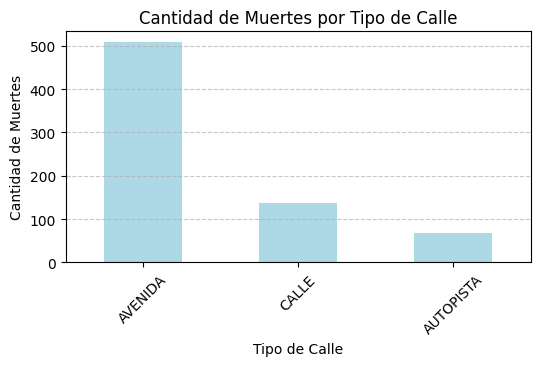

In [25]:
# Gráfico la comuna y tipo de calle donde ocurren los siniestros viales.
#Ubicación por comuna.
plt.figure(figsize=(6, 3))
sns.countplot(y=df_siniestros["COMUNA"], order=df_siniestros["COMUNA"].value_counts().index, palette="pastel")
plt.title("Ubicación de Siniestros")
plt.xlabel("Número de Siniestros")
plt.ylabel("Comuna")
plt.show()

# Tipo de calle
plt.figure(figsize=(6, 3))
df_siniestros["TIPO_DE_CALLE"].value_counts().plot(kind="bar", color="lightblue")
plt.xlabel("Tipo de Calle")
plt.ylabel("Cantidad de Muertes")
plt.title("Cantidad de Muertes por Tipo de Calle")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Los gráficos anteriores nos muestran que la comuna N° 1 y las avenidas  son las lugares donde se registran la mayor cantidad de siniestros.

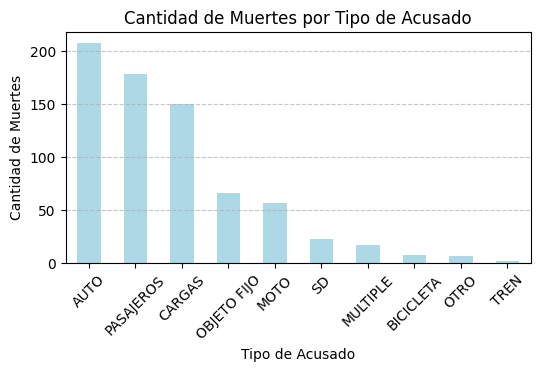

In [26]:
# Grafico la cantidad de muertes por tipo de acusado
plt.figure(figsize=(6, 3))
df_siniestros["ACUSADO"].value_counts().plot(kind="bar", color="lightblue")
plt.xlabel("Tipo de Acusado")
plt.ylabel("Cantidad de Muertes")
plt.title("Cantidad de Muertes por Tipo de Acusado")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Este gráfico nos muestra que en gran medida la mayoría de los siniestros tienen involucrados autos, pasasjeros y cargas.

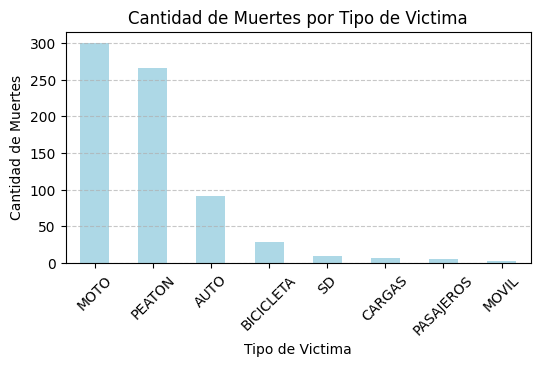

In [27]:
# Obtengo la cantidad de muertes por tipo de víctima
plt.figure(figsize=(6, 3))
df_siniestros["VICTIMA"].value_counts().plot(kind="bar", color="lightblue")
plt.xlabel("Tipo de Victima")
plt.ylabel("Cantidad de Muertes")
plt.title("Cantidad de Muertes por Tipo de Victima")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Las categorías más implicadas en los siniestros son motos, peatos y autos en una menor medida.

Total de víctimas involucradas: 751


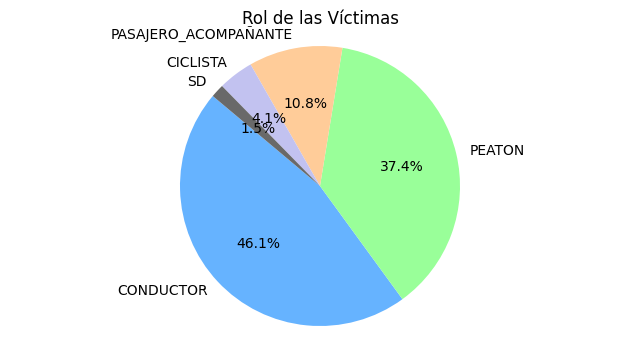

In [28]:
# Analizo la cantidad de victimas y el rol al momento del siniestro.
# Número total de víctimas
total_victimas = df_siniestros["N_VICTIMAS"].sum()
print(f"Total de víctimas involucradas: {total_victimas}")

# Rol de las víctimas
rol_victimas = df_siniestros["ROL"].value_counts()

# Gráfico de pastel para el rol de las víctimas
plt.figure(figsize=(8, 4))
plt.pie(rol_victimas, labels=rol_victimas.index, autopct='%1.1f%%', startangle=140, colors=["#66b3ff","#99ff99","#ffcc99","#c2c2f0","#696969"])
plt.title("Rol de las Víctimas")
plt.axis("equal")  
plt.show()

El gráfico nos indica que el rol de las victimas al momento del siniestro está dado en su mayoria por los conductores y peatones.

SEXO
MASCULINO    539
FEMENINO     166
SD             6
Name: count, dtype: int64


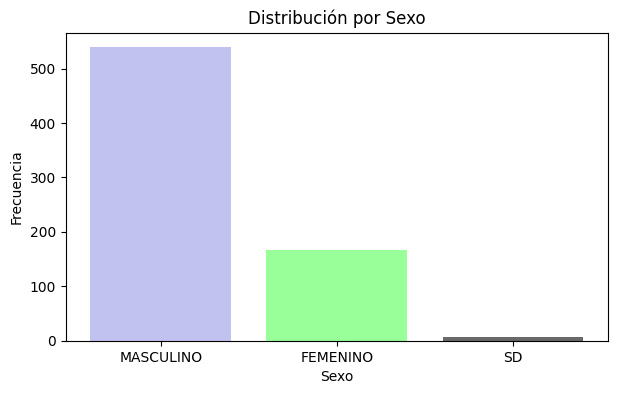

In [29]:
# Distribución por Sexo 
print(df_siniestros["SEXO"].value_counts())

# Gráfico la distribución por sexo
sexo_counts = df_siniestros["SEXO"].value_counts()
plt.figure(figsize=(7, 4))
plt.bar(sexo_counts.index, sexo_counts.values, color=["#c2c2f0","#99ff99","#696969"])
plt.xlabel("Sexo")
plt.ylabel("Frecuencia")
plt.title("Distribución por Sexo")
plt.show()

El gráfico nos muestra que por distribución de género, el masculino es el más afectado. Esto podria deberse en parte a que en términos de estadistica, los hombres tienen un mayor porcentaje de licencias de conducir que las mujeres.
Fuente: _https://estadisticaciudad.gob.ar/eyc/?p=29209_

_Identificar áreas geográficas con mayor incidencia de siniestros viales y víctimas fatales_

In [30]:
# Importo la libreria que me permitirá crear un mapa interactivo
import folium
from folium.plugins import HeatMap

In [31]:
# Realizo un mapa de calor con el objetivo de visualizar el área con mayor accidentes.

def mapa_calor_siniestros(datos):
    # Cargo los datos
    df = pd.read_csv("./Datasets/Siniestros.csv")

    # Convierto las coordenadas a números.
    df["POS_Y"] = pd.to_numeric(df["POS_Y"], errors="coerce")
    df["POS_X"] = pd.to_numeric(df["POS_X"], errors="coerce")

    # Filtro por siniestros y víctimas fatales
    siniestros = df[["POS_Y", "POS_X"]].dropna()
    victimas_fatales = df[df["N_VICTIMAS"].notnull()][["POS_Y", "POS_X"]].dropna()

    # Creo un mapa centrado en un punto específico (latitud, longitud)
    mapa = folium.Map(location=[-34.6083, -58.3712], zoom_start=12)

    # Creo mapas de calor para siniestros y víctimas fatales
    HeatMap(data=siniestros, radius=15).add_to(mapa)
    HeatMap(data=victimas_fatales, radius=15, gradient={.4: "red", .65: "orange", 1: "darkred"}).add_to(mapa)

    return mapa

# Utilizo la función.
mapa = mapa_calor_siniestros("./Datasets/Siniestros.csv")

# Guardo el mapa como un archivo HTML
mapa.save("mapa_siniestros.html")

 _Exploración y análisis de data para los KPIs (Indicador Clave de Desempeño)_

KPI 1: Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior

In [32]:
# Para realizar este KPI, creo un nuevo df con la inforacíón especifica.
# Filtro los siniestros fatales
Uno= df_siniestros[df_siniestros["N_VICTIMAS"] == 1]
# Creo columna 'SEMESTRE' a partir de los meses
Uno["SEMESTRE"] = (Uno["MM"] - 1) // 6 + 1
# Agrupo  por año/ semestre y se cuentan  los homicidios viales
Uno = Uno.groupby(["AAAA", "SEMESTRE"]).size().reset_index(name="VICTIMAS")
# Creo la  columna 'SEMESTRE_ANTERIOR'
Uno["SEMESTRE_ANT"] = Uno["VICTIMAS"].shift(periods=1, fill_value=0)
# Calculo la tasa de homicidios por cada 100.000 habitantes teniendo en cuenta la población de CABA
poblacion_caba = 3120612
Uno["TASA_VICTIMAS"] = (Uno["VICTIMAS"] / poblacion_caba) * 100000
Uno["TASA_SEMESTRE_ANT"] = (Uno["SEMESTRE_ANT"] / poblacion_caba) * 100000
# Calculo la variación porcentual en homicidios y tasas
Uno["VARIACION_TASAS"] = (Uno["TASA_VICTIMAS"] - Uno["TASA_SEMESTRE_ANT"]) / Uno["TASA_SEMESTRE_ANT"] * 100

Uno["SEMESTRE"] = [6 if a == 2 else a for a in Uno["SEMESTRE"]]
Uno["AAAA"] = pd.to_numeric(Uno["AAAA"], errors="coerce")
Uno["SEMESTRE"] = pd.to_numeric(Uno["SEMESTRE"], errors="coerce")
Uno = Uno.dropna(subset=["AAAA", "SEMESTRE"])
Uno["AAAA"] = Uno["AAAA"].astype(int)
Uno["SEMESTRE"] = Uno["SEMESTRE"].astype(int)
Uno["FECHA"] = Uno["AAAA"].astype(str) + "-" + Uno["SEMESTRE"].astype(str) + "-01"
Uno["FECHA"] = pd.to_datetime(Uno["FECHA"], format="%Y-%m-%d")
Uno


,AAAA,SEMESTRE,VICTIMAS,SEMESTRE_ANT,TASA_VICTIMAS,TASA_SEMESTRE_ANT,VARIACION_TASAS,FECHA
0,2016,1,63,0,2.018835,0.000000,inf,2016-01-01
1,2016,6,78,63,2.499510,2.018835,23.809524,2016-06-01
2,2017,1,59,78,1.890655,2.499510,-24.358974,2017-01-01
3,2017,6,63,59,2.018835,1.890655,6.779661,2017-06-01
4,2018,1,64,63,2.050880,2.018835,1.587302,2018-01-01
5,2018,6,73,64,2.339285,2.050880,14.062500,2018-06-01
6,2019,1,55,73,1.762475,2.339285,-24.657534,2019-01-01
7,2019,6,47,55,1.506115,1.762475,-14.545455,2019-06-01
8,2020,1,31,47,0.993395,1.506115,-34.042553,2020-01-01
9,2020,6,44,31,1.409980,0.993395,41.935484,2020-06-01


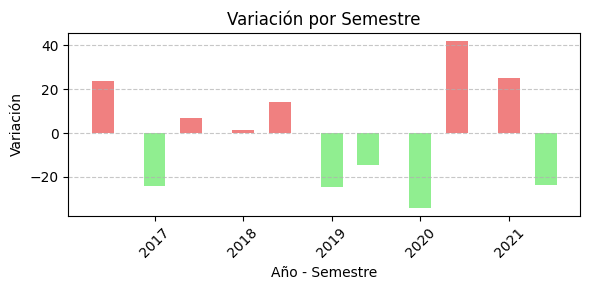

In [33]:
 # Grafico la variación de las tasa por semestres.
plt.figure(figsize=(6, 3))
colores = ["lightgreen" if valor < -10 else "lightcoral" for valor in Uno["VARIACION_TASAS"]]
plt.bar(Uno["FECHA"], Uno["VARIACION_TASAS"], color=colores, width=90)
plt.xlabel("Año - Semestre")
plt.ylabel("Variación")
plt.title("Variación por Semestre")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

A pesar de que se puede apreciar una tendencia descendente, también es evidente que existen semestres con incrementos con respecto al periodo anterior. El primer semestre de 2020 se destaca por experimentar la mayor disminución, lo cual puede atribuirse a la reducida circulación de vehículos debido a las restricciones por la pandemia de Covid.

En el último semestre analizado del 2021, se supera el KPI establecido, **logrando una reducción del 23,64% en la tasa de homicidios** en comparación con el semestre previo.

Población total en CABA. Fuente: https://portalgeoestadistico.indec.gob.ar/

In [34]:
#Luego convierto el dataframe a csv para utilizarlo para la creación del dashboard
Uno.to_csv("KPI_Uno.csv", index=False)

KPI 2: Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior

In [35]:
#Filtro los siniestros de motos.
Dos= df_siniestros[df_siniestros["N_VICTIMAS"] ==1]
Dos = Dos[Dos["VICTIMA"] == "MOTO"]
Dos = Dos.groupby(["AAAA"]).size().reset_index(name="VICTIMAS")
Dos["AÑO_ANTERIOR"] = Dos["VICTIMAS"].shift(periods=1, fill_value=0)
Dos["TASA_VICTIMAS"] = (Dos["VICTIMAS"]/3120612) * 100000
Dos["TASA_AÑO_ANTERIOR"] = (Dos["AÑO_ANTERIOR"]/3120612) * 100000

# Calculo la variaiónn porcentual
Dos["VARIACION"] = (Dos["TASA_VICTIMAS"] - Dos["TASA_AÑO_ANTERIOR"]) / Dos["TASA_AÑO_ANTERIOR"] * 100

Dos

,AAAA,VICTIMAS,AÑO_ANTERIOR,TASA_VICTIMAS,TASA_AÑO_ANTERIOR,VARIACION
0,2016,62,0,1.986790,0.000000,inf
1,2017,49,62,1.570205,1.986790,-20.967742
2,2018,53,49,1.698385,1.570205,8.163265
3,2019,50,53,1.602250,1.698385,-5.660377
4,2020,26,50,0.833170,1.602250,-48.000000
5,2021,46,26,1.474070,0.833170,76.923077


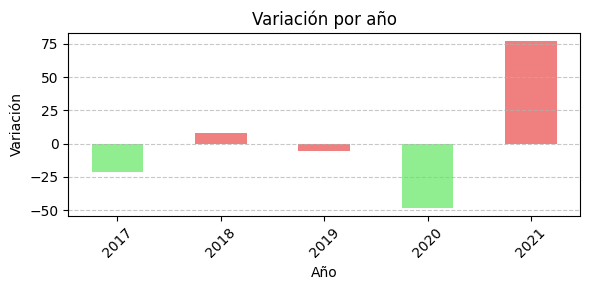

In [36]:
 # Grafico la variación de las tasa por años.
plt.figure(figsize=(6, 3))
colores = ["lightgreen" if valor < -7 else "lightcoral" for valor in Dos["VARIACION"]]
plt.bar(Dos["AAAA"], Dos["VARIACION"], color=colores, width=0.5)
plt.xlabel("Año")
plt.ylabel("Variación")
plt.title("Variación por año")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

Claramente podemos evidenciar que en el año 2020 presenta un mayor descenso,que los años anteriores, el mismo es atribuido a la reducida circulación de vehículos a causa de la pandemia por Covid. 
En el último año analizado, el KPI **no se cumple con la meta establecida del 7%**, ya que la tasa de siniestros de motociclistas aumenta un 76,92% con respecto al año anterior. 

In [37]:
#Luego convierto el dataframe a csv para utilizarlo para la creación del dashboard
Dos.to_csv("KPI_Dos.csv", index=False)

KPI 3: Reducir en un 5% la cantidad de siniestros de peatones En el último año respecto al año anterior

In [38]:
#Filtro los siniestros de peatones.
Tres = df_siniestros[df_siniestros["N_VICTIMAS"]==1]
Tres = Tres[Tres["VICTIMA"] == "PEATON"]
Tres = Tres.groupby(["AAAA"]).size().reset_index(name="VICTIMAS")
Tres["AÑO_ANTERIOR"] = Tres["VICTIMAS"].shift(periods=1, fill_value=0)
Tres["TASA_VICTIMAS"] = (Tres["VICTIMAS"]/3120612) * 100000
Tres["TASA_AÑO_ANTERIOR"] = (Tres["AÑO_ANTERIOR"]/3120612) * 100000
Tres["VARIACION"] = (Tres["VICTIMAS"] - Tres["AÑO_ANTERIOR"]) / Tres["AÑO_ANTERIOR"] * 100
Tres["VARIACION"] = (Tres["TASA_VICTIMAS"] - Tres["TASA_AÑO_ANTERIOR"]) / Tres["TASA_AÑO_ANTERIOR"] * 100
Tres

,AAAA,VICTIMAS,AÑO_ANTERIOR,TASA_VICTIMAS,TASA_AÑO_ANTERIOR,VARIACION
0,2016,49,0,1.570205,0.000000,inf
1,2017,49,49,1.570205,1.570205,0.000000
2,2018,64,49,2.050880,1.570205,30.612245
3,2019,33,64,1.057485,2.050880,-48.437500
4,2020,34,33,1.089530,1.057485,3.030303
5,2021,33,34,1.057485,1.089530,-2.941176


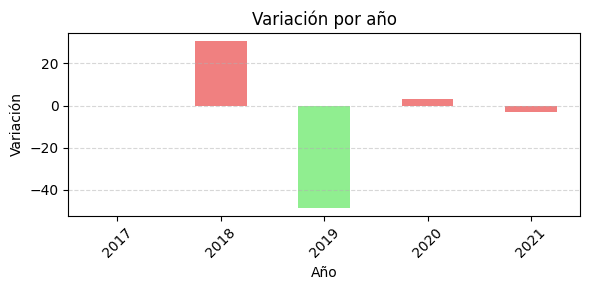

In [39]:
 # Grafico la variación de las tasa por años.
plt.figure(figsize=(6, 3))
colores = ["lightgreen" if valor < -5 else "lightcoral" for valor in Tres["VARIACION"]]
plt.bar(Tres["AAAA"], Tres["VARIACION"], color=colores, width=0.5)
plt.xlabel("Año")
plt.ylabel("Variación")
plt.title("Variación por año")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle= "--", alpha=0.5)
plt.tight_layout()
plt.show()

Podemos evidenciar que en el año 2021 hubo una reducción de siniestros relacionados a peatones en comparación con el año 2020; pero **no logró cumplir con la meta establecida del 5%**, reduciendose la misma un 2.94%.


In [40]:
#Luego convierto el dataframe a csv para utilizarlo para la creación del dashboard
Tres.to_csv("KPI_Tres.csv", index=False)